# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студентки гр. 0382 Деткова Анна и Рубежова Наталия. Вариант №11.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

&emsp;*__Дискретный сигнал $x_0, x_1, ..., x_{N-1}$__* получается при **дискретизации аналогового сигнала $s(t)$** (определённого во все моменты времени).   

&emsp;То есть, $x_k \ (k\in 𝐙, k \in [0,N - 1])$ получены в результате равномерной дискретизации сигнала $s(t)$ с шагом дискретизации $T=1$:  $$x_k = s(t_k), k = 0, 1, ..., N - 1;$$ $$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$


&emsp;*__Спектр дискретного сигнала__*:  
&emsp; $s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$ - дискретный сигнал как функция от времени.

&emsp;Пользуясь свойствами преобразования Фурье, *__спектр дискретного сигнала__* можно представить в виде периодической функции с периодом, равным $2\pi$: $$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

&emsp;*__Дискретное преобразование Фурье (ДПФ)__*:  
&emsp;Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$, то есть $\forall k \ x_{k+N} = x_k $

&emsp;Рассмотрим фрагмент последовательности из N отсчётов. Например, $\{x_k: k = 0,1,2,...,N-1\}$.
&emsp;Тогда дискретная функция $s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$ *__тоже будет периодической__*, с периодом $NT$. Здесь $T$ - период дискретизации.  

&emsp;Спектр $s(t)$ также должен быть периодическим (с периодом $T = \frac{2\pi}{T}$) и дискретным с расстоянием между гармониками $\frac{2\pi}{NT}$.  
&emsp;Поскольку $s(t)$ периодическая функция, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле:

&emsp;$X(n) = \frac{1}{NT}\sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [80]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(ω_kt+φ_k)$.
#####*Частота каждой из гармоник не должна превышать $π$*.

#####*Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до π, изменяющимися с шагом $Δω=0.1π$.*

#####*Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел.*

######*При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд.*

#####*Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5.*

#####*Дискретная последовательность должна включать в себя 32 отсчета.*

*__Решение:__*

&emsp; *__Аналоговый сигнал__* по условию представляет собой линейную комбинацию косинусоид вида: $$s(t) = \sum_{k} A_k cos(\omega_k t + \varphi_k)$$

&emsp; *__Дискретный сигнал__* был получен посредством дискретизации с шагом $T=1$ *аналогового сигнала*: $$\begin{cases}x_k = s(t_k), \ (k=0,1,...N-1)\\T=t_k - t_{k-1} = 1, \ (k=1,2,...N-1)\end{cases}$$

&emsp;Запрограммируем формирование аналогового и дискретного сигнала согласно формулам:

In [95]:
# Установка параметров
K = 11
Delta_omega = 0.1 * np.pi
N = 32
T = 1

# Генерация случайных амплитуд
A_k = np.random.randint(1, 12, K)

# Генерация случайных начальных фаз
phi_k = np.random.uniform(0, 0.5, K)

# Генерация частот
omega_k = np.arange(0, K * Delta_omega, Delta_omega)

# Создание временной оси  для дискретного сигнала
t = np.arange(0, N * T, T)

# Создание временной оси для аналогового сигнала
t_analog = np.linspace(0, (N - 1) * T, 1000)

# Формирование аналогового сигнала
analog_signal = np.zeros_like(t_analog)

for k in range(K):
    analog_signal += A_k[k] * np.cos(omega_k[k] * t_analog + phi_k[k])

# Дискретизация аналогового сигнала с шагом T=1
discrete_signal = analog_signal[np.arange(0, len(t_analog), int(1000/N))[:N]]

# Нормализация коэффициентов
discrete_signal /= np.sum(A_k)

&emsp; *С визуализацией и выводом можно ознакомиться в п.2*.

---

#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

&emsp;Используя сформированные в п.1 *аналоговый и дискретный сигналы*, выведем графики получившихся сигналов:

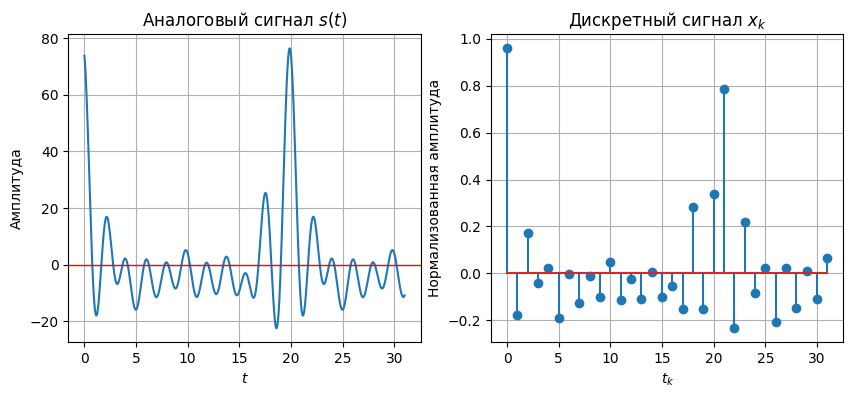

In [96]:
# Вывод графиков
plt.figure(figsize=(10, 4))

# График аналогового сигнала
plt.subplot(1, 2, 1)
plt.plot(t_analog, analog_signal)
plt.axhline(y=0.0, color='red', linewidth=1.0)
plt.title('Аналоговый сигнал $s(t)$')
plt.xlabel('$t$')
plt.ylabel('Амплитуда')
plt.grid()

# График дискретного сигнала
plt.subplot(1, 2, 2)
plt.stem(t, discrete_signal)
plt.title('Дискретный сигнал $x_k$')
plt.xlabel('$t_k$')
plt.ylabel('Нормализованная амплитуда')
plt.grid()

plt.show()

*__Вывод__*

&emsp;Сравнив графики, можем убедиться, что дискретный сигнал, действительно, получился дискретизированной "версией" аналогового сигнала.

&emsp;Видим, что амплитуды обоих сигналов сопоставимы вдоль временной оси с небольшими допущениями в силу частоты дискретизации. Причем, от частоты дискретизации, зависит, насколько "точным" будет дискретный сигнал. А нормализация коэффициентов дискретного сигнала обеспечивает, что его амплитуды сохраняют относительные веса в аналоговом сигнале.



---

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

&emsp;Если дискретный сигнал представить в виде функции от времени: $\ \ s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$ <br>
&emsp;То, пользуясь свойствами дискретного преобразования Фурье (ДПФ), *__спектр дискретного сигнала__* можно представить в виде периодической функции с периодом, равным $\frac{2\pi}{T}=2\pi$: $$S(\omega) = \sum_{k} x_k e^{-i\omega k}, \ где \  k \in [0, N-1]$$
$$X(n)=S(\frac{2\pi n}{N})=\sum_{k} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n=0,1,2, \ldots, N-1$$
&emsp;Реализуем функцию, вычисляющую дискретные отсчеты исходного дискретного сигнала и построим график, визуализирующий результаты.

Text(0, 0.5, '$S(ω)$')

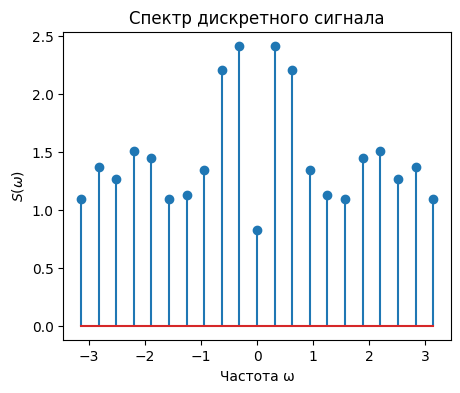

In [115]:
# Массив частот ω
omega_arr = np.arange(-np.pi, np.pi+0.1*np.pi, 0.1*np.pi)

# Вычисление спектра исходного дискретного сигнала
def spectr_initial(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += discrete_signal[k]*np.exp(-1j*omega*k)

  return spectr_sum

# Вывод графика спектра дискретного сигнала
plt.figure(figsize=(5, 4))
plt.subplot(1, 1, 1)
plt.stem(omega_arr, [np.abs(spectr_initial(omega)) for omega in omega_arr])
plt.title(r'Спектр дискретного сигнала')
plt.xlabel(r'Частота ω')
plt.ylabel(r'$S(ω)$')

---

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.

Применим для дискретного сигнала *__сглаживание прямой__* по 5-ти и 9-ти точкам:

&emsp;В общем случае: <br>
&emsp;&emsp;$y_n=\frac{1}{2m+1} \sum_{k=n-m}^{n+m} s_k=\frac{1}{2m+1}(s_{n-m}+s_{n-m+1}+...+s_{n+m-1}+s_{n+m})$

&emsp;Тогда, для 5 точек: $\ \ y_k = \frac{x_{k-2}+x_{n-1}+x_{k}+x_{n+1}+x_{k+2}}{5}$

&emsp;Для 9 точек: $\ \ y_k = \frac{x_{k-4}+x_{k-3}+x_{k-2}+x_{k-1}+x_{k}+x_{k+1}+x_{k+2}+x_{k+3}+x_{k+4}}{9}$

Формулы для $H(ω)$ – передаточной функции (частотной характеристики) фильтра:

&emsp;$\tilde H_5(f)=\frac{sin(5\pi f)}{5 sin(\pi f)}$<br>
&emsp;$\tilde H_9(f)=\frac{sin(9\pi f)}{9 sin(\pi f)}$<br>

Реализуем функции, применяющие линейные сглаживания к исходному дискретному сигналу.

In [98]:
# Линейное сглаживание по 5 точкам
def linear_5(signal):
  smooth_signal = np.zeros(len(signal))
  for i in range(2, len(signal)-2):
    smooth_signal[i] = (signal[i-2] + signal[i-1] + signal[i] + signal[i+1] + signal[i+2])/5
  return smooth_signal
# Линейное сглаживание по 9 точкам
def linear_9(signal):
  smooth_signal = np.zeros(len(signal))
  for i in range(4, len(signal)-4):
    smooth_signal[i] = (signal[i-4] + signal[i-3] + signal[i-2] + signal[i-1] + signal[i] + signal[i+4] + signal[i+3] + signal[i+2] + signal[i+1])/9
  return smooth_signal

filtered_linear_5 = np.convolve(discrete_signal, np.ones(5), 'same') / 5
filtered_linear_9 = np.convolve(discrete_signal, np.ones(9), 'same') / 9

---

####5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

&emsp;Визуализируем после фильтрации сглаженный прямой по 5 и 9 точкам дискретный сигнал в сравнении с исходным.

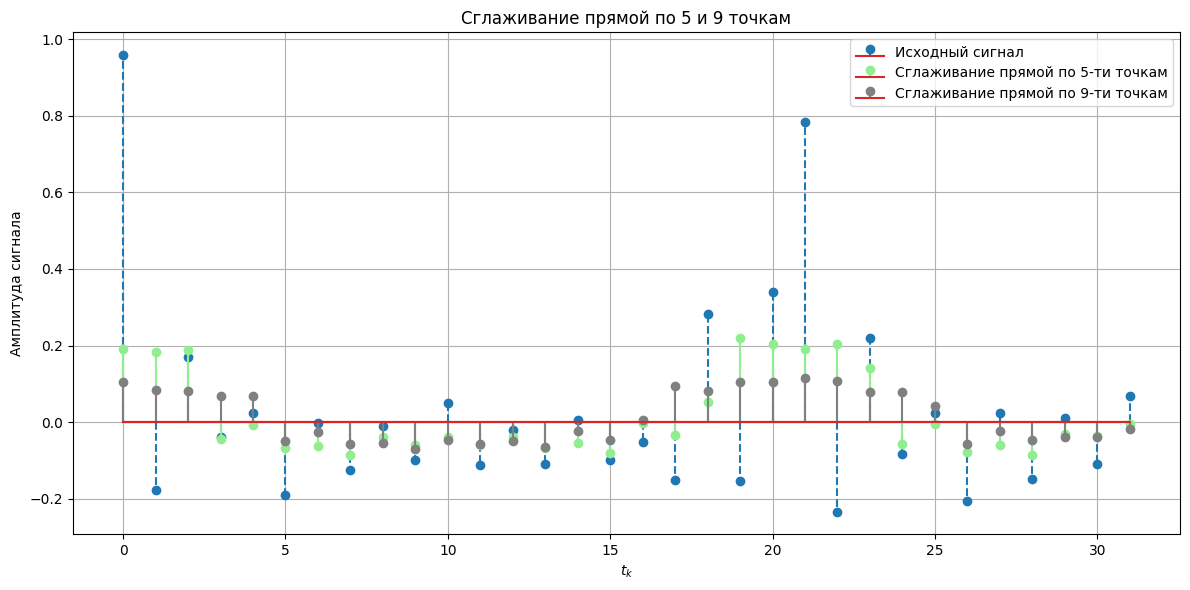

In [101]:
plt.figure(figsize=(12, 6))
plt.title('Сглаживание прямой по 5 и 9 точкам')
plt.xlabel('$t_k$')
plt.ylabel('Амплитуда сигнала')
plt.stem(t, discrete_signal, '--',label='Исходный сигнал')
plt.stem(t, filtered_linear_5, 'lightgreen', label='Сглаживание прямой по 5-ти точкам')
plt.stem(t, filtered_linear_9, 'gray', label='Сглаживание прямой по 9-ти точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


---

####6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

&emsp;Найдем дискретные отсчеты спектра дискретного сигнала после его сглаживания прямой и визуализируем результаты в сравнении с исходным спектром, полученным в п.3

In [102]:
# Вычисление дискретных отсчетов спектра дискретных сигналов
def spectr_filtered_5(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += filtered_linear_5[k]*np.exp(-1j*omega*k)
  return spectr_sum

def spectr_filtered_9(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += filtered_linear_9[k]*np.exp(-1j*omega*k)
  return spectr_sum

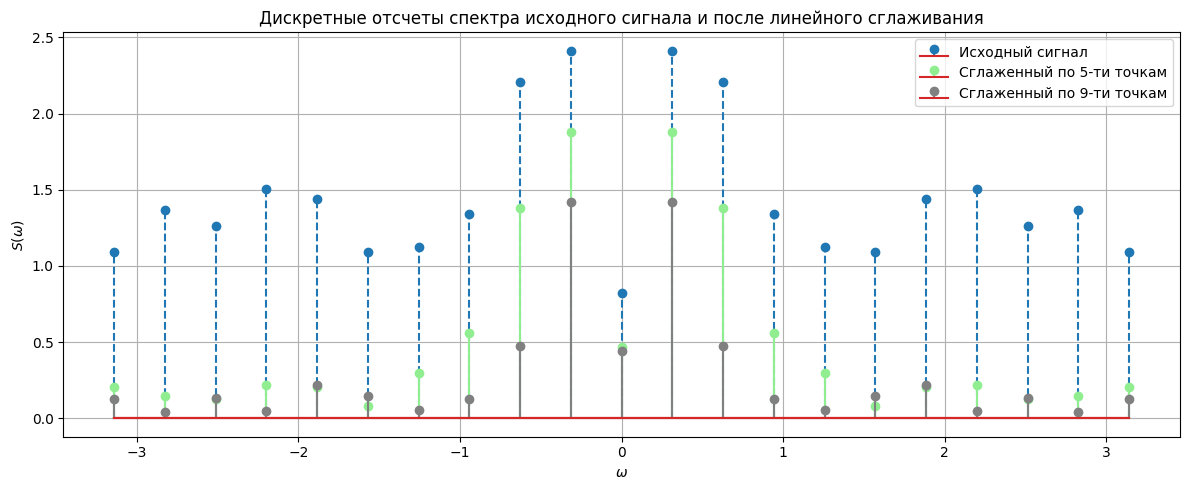

In [103]:
plt.figure(figsize=(12, 5))
plt.title('Дискретные отсчеты спектра исходного сигнала и после линейного сглаживания')
plt.xlabel('$ω$')
plt.ylabel('$S(\omega)$')
plt.stem(omega_arr, [np.abs(spectr_initial(omega)) for omega in omega_arr], '--',label='Исходный сигнал')
plt.stem(omega_arr, [np.abs(spectr_filtered_5(omega)) for omega in omega_arr], 'lightgreen',label='Сглаженный по 5-ти точкам')
plt.stem(omega_arr, [np.abs(spectr_filtered_9(omega)) for omega in omega_arr], 'gray',label='Сглаженный по 9-ти точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


---

####7. Проанализировать результат на соответствие значениям $H(\omega)$  . Сделать выводы.

&emsp;Визуально оценив графики при сглаживании прямой по 5 и 9 точкам, можем сделать вывод о том, что результат сопоставим со значениями $H(\omega)$, поскольку также:
* С увеличением частоты $\omega$ увеличивается подавление сигнала
* В окрестностях точки $\omega=0$ есть полоса пропускания (диапазон частот, которые почти не фильтруются)
* С увеличением числа точек высокие частоты подавляются сильнее и уменьшается полоса пропускания частот


---

####8. Повторить п. 4–7 для следующих фильтров:
&emsp;&emsp;a) Сглаживание полиномом 2-ой степени по 5 и 9 узлам.<br>
&emsp;&emsp;b) Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

#####*__a) Сглаживание полиномом 2ой степени по 5 и 9 точкам__*



ПУНКТ4.
Применим для дискретного сигнала *__сглаживание полиномом 2 степени__* по 5-ти и 9-ти точкам:

&emsp;Для 5 точек: $y_k = \frac{-3x_{k-2} + 12x_{k-1} + 17x_{k} +12x_{k+1} - 3x_{k+2}}{35}$

&emsp;Для 9 точек: $y_k = \frac{-21x_{k-4}+14x_{k-3}+39x_{k-2}+54x_{k-1}+59x_{k}+54x_{k+1}+39x_{k+2}+14x_{k+3}-21x_{k+4}}{231}$  

Формулы для $H(ω)$ – передаточной функции (частотной характеристики) фильтра:

&emsp;$H_5(\omega)=\frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$<br>
&emsp;$H_9(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$<br>

Реализуем функцию, реализующую сглаживание полиномом $m$-степени с массивом коэффциентов $coeffs$.

В данном случае $coeffs\_5=[-3, 12, 17, 12, -3], \ coeffs\_9=[-21, 14, 39, 54, 59, 54, 39, 14, -21]$

In [105]:
coeffs_5 = [-3, 12, 17, 12, -3]
coeffs_9 = [-21, 14, 39, 54, 59, 54, 39, 14, -21]

# Cглаживание полиномом k-степени с коэффициентами coeffs для 2m+1 точек
def smooth_filter(m, coeffs):
    res_signal = []
    for i in range(0, len(discrete_signal)):
        cur_signal = []
        if (i < m):
            for j in range(-i, m+1):
                cur_signal.append(coeffs[m+j]*discrete_signal[i+j])
            while (len(cur_signal) < 2 * m + 1):
                cur_signal.append(coeffs[2*m+1-len(cur_signal)-1]*discrete_signal[i])
        else:
            if (len(discrete_signal) - i <= m):
                for j in range(-m, len(discrete_signal) - i):
                    cur_signal.append(coeffs[m+j]*discrete_signal[i+j])
                while (len(cur_signal) < 2 * m + 1):
                    cur_signal.append(coeffs[2*m+1-len(cur_signal)-1]*discrete_signal[i])
            else:
                for j in range(-m, m + 1):
                    cur_signal.append(coeffs[m+j]*discrete_signal[i+j])
        # нормирование по сумме коэффициентов
        res_signal.append(sum(cur_signal) / sum(coeffs))
    return res_signal

filtered_square_5 = smooth_filter(2, coeffs_5) # m=2, поскольку для 2m+1=5 точек
filtered_square_9 = smooth_filter(4, coeffs_9) # m=4, поскольку для 2m+1=9 точек

ПУНКТ5.
&emsp;Визуализируем после фильтрации сглаженный полиномом 2 степени по 5 и 9 точкам дискретный сигнал в сравнении с исходным.

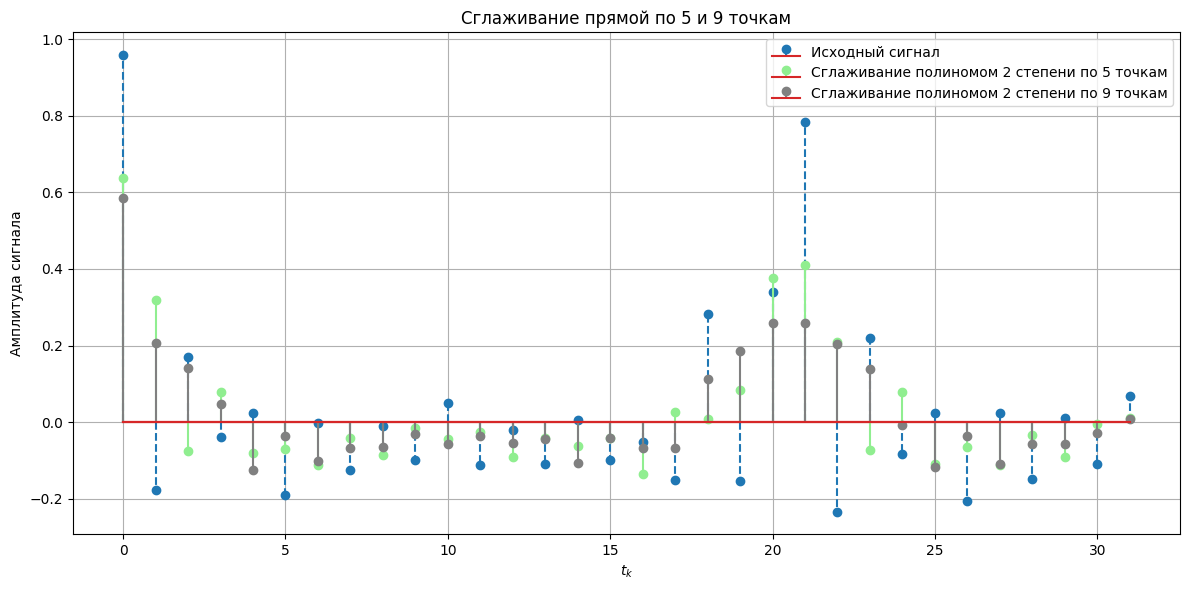

In [107]:
plt.figure(figsize=(12, 6))
plt.title('Сглаживание прямой по 5 и 9 точкам')
plt.xlabel('$t_k$')
plt.ylabel('Амплитуда сигнала')
plt.stem(t, discrete_signal, '--',label='Исходный сигнал')
plt.stem(t, filtered_square_5, 'lightgreen', label='Сглаживание полиномом 2 степени по 5 точкам')
plt.stem(t, filtered_square_9, 'gray', label='Сглаживание полиномом 2 степени по 9 точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

ПУНКТ6.
&emsp;Найдем дискретные отсчеты спектра дискретного сигнала после его сглаживания полиномом 2 степени и визуализируем результаты в сравнении с исходным спектром, полученным в п.3

In [108]:
# Вычисление дискретных отсчетов спектра дискретных сигналов
def spectr_square_5(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += filtered_square_5[k]*np.exp(-1j*omega*k)
  return spectr_sum

def spectr_square_9(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += filtered_square_9[k]*np.exp(-1j*omega*k)
  return spectr_sum

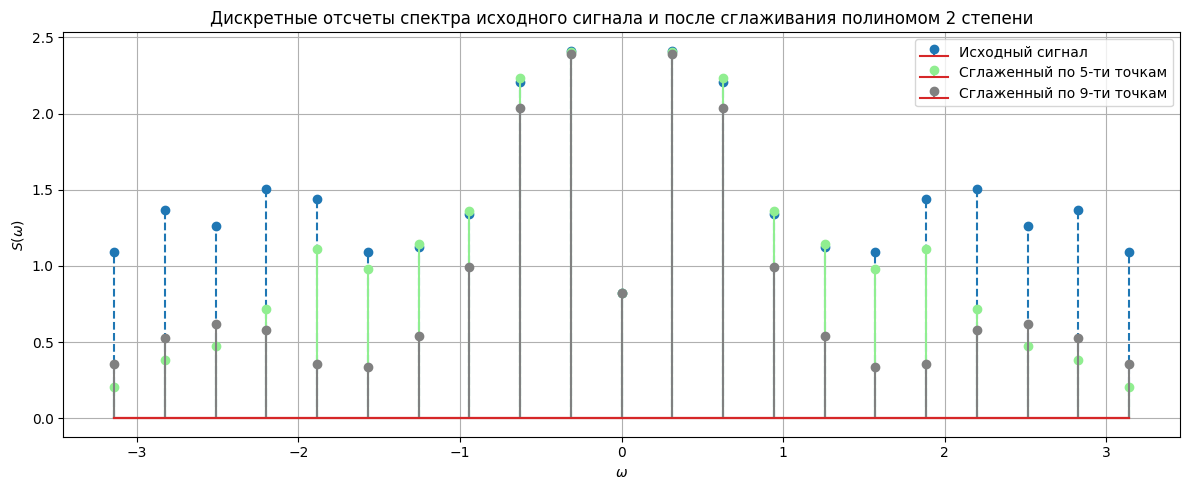

In [110]:
plt.figure(figsize=(12, 5))
plt.title('Дискретные отсчеты спектра исходного сигнала и после сглаживания полиномом 2 степени')
plt.xlabel('$ω$')
plt.ylabel('$S(\omega)$')
plt.stem(omega_arr, [np.abs(spectr_initial(omega)) for omega in omega_arr], '--',label='Исходный сигнал')
plt.stem(omega_arr, [np.abs(spectr_square_5(omega)) for omega in omega_arr], 'lightgreen',label='Сглаженный по 5-ти точкам')
plt.stem(omega_arr, [np.abs(spectr_square_9(omega)) for omega in omega_arr], 'gray',label='Сглаженный по 9-ти точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

ПУНКТ 7.
&emsp;Визуально оценив графики при сглаживании полиномом 4 степени по 5 и 9 точкам, можем сделать вывод о том, что результат сопоставим со значениями $H(\omega)$, поскольку также:
* С увеличением частоты $\omega$ увеличивается подавление сигнала
* В окрестностях точки $\omega=0$ (низкие частоты) есть полоса пропускания (диапазон частот, которые почти не фильтруются)
* С увеличением числа точек высокие частоты подавляются сильнее

&emsp; Также, можем заметить, что *__полоса пропускания частот здесь шире, чем при сглаживании прямой линией__*.

---

#####*__b) Сглаживание полиномом 4ой степени по 7 и 11 точкам__*



ПУНКТ4.
Применим для дискретного сигнала *__сглаживание полиномом 4 степени__* по 7 и 11 точкам:

&emsp;Для 7 точек: $y_k = \frac{5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3}}{231}$

&emsp;Для 11 точек: $y_k=\frac{18x_{k-5}-45x_{k-4}-10x_{k-3}+60x_{k-2}+120x_{k-1}+143x_{k}+120x_{k+1}+60x_{k+2}-10x_{k+3}-45x_{k+4}+18x_{k+5}}{429}$  

Формулы для $H(ω)$ – передаточной функции (частотной характеристики) фильтра:

&emsp;$H(\omega) = \frac{131 + 150cos(\omega) - 60cos(2\omega) + 10cos(3\omega)}{231}$<br>
&emsp;$H(\omega) = \frac{143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)}{429}$<br>

Применим фильтр, реализующий сглаживание полиномом $4$-степени с массивом коэффциентов $coeffs$.

В данном случае $coeffs\_7=[5, -30, 75, 131, 75, -30, 5], \ coeffs\_11=[18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]$

In [111]:
coeffs_7 = [5, -30, 75, 131, 75, -30, 5]
coeffs_11 = [18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]

filtered_quadro_7 = smooth_filter(3, coeffs_7) # m=3, поскольку для 2m+1=7 точек
filtered_quadro_11 = smooth_filter(5, coeffs_11) # m=5, поскольку для 2m+1=11 точек

ПУНКТ5.
&emsp;Визуализируем после фильтрации сглаженный полиномом 4 степени по 7 и 11 точкам дискретный сигнал в сравнении с исходным.

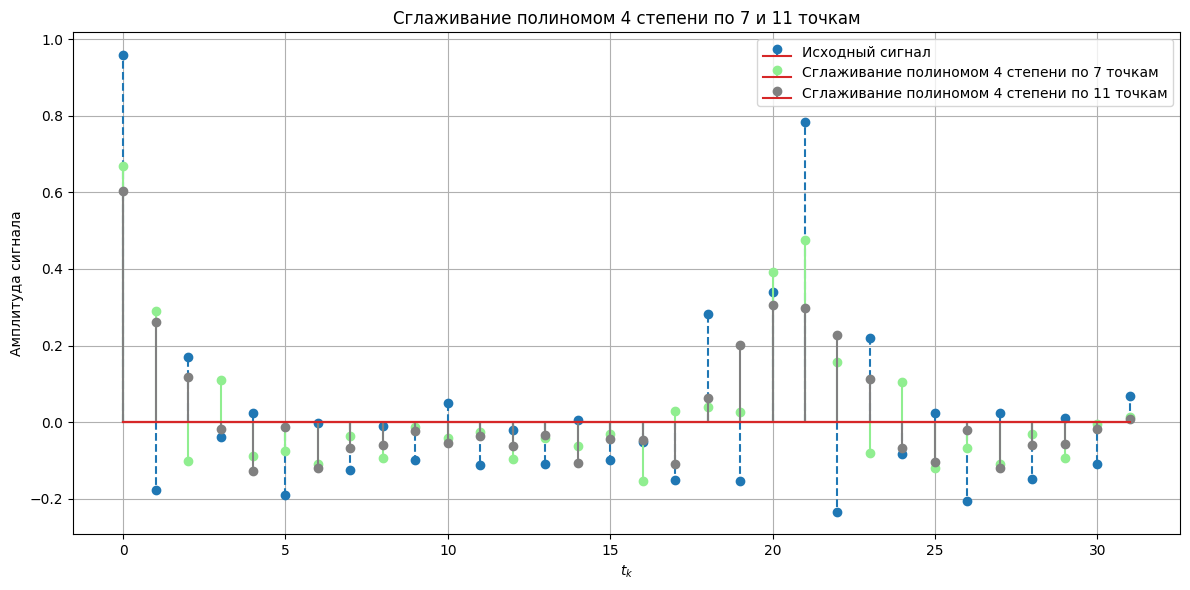

In [112]:
plt.figure(figsize=(12, 6))
plt.title('Сглаживание полиномом 4 степени по 7 и 11 точкам')
plt.xlabel('$t_k$')
plt.ylabel('Амплитуда сигнала')
plt.stem(t, discrete_signal, '--',label='Исходный сигнал')
plt.stem(t, filtered_quadro_7, 'lightgreen', label='Сглаживание полиномом 4 степени по 7 точкам')
plt.stem(t, filtered_quadro_11, 'gray', label='Сглаживание полиномом 4 степени по 11 точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

ПУНКТ6.
&emsp;Найдем дискретные отсчеты спектра дискретного сигнала после его сглаживания полиномом 4 степени и визуализируем результаты в сравнении с исходным спектром, полученным в п.3

In [113]:
# Вычисление дискретных отсчетов спектра дискретных сигналов
def spectr_quadro_7(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += filtered_quadro_7[k]*np.exp(-1j*omega*k)
  return spectr_sum

def spectr_quadro_11(omega):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, 32):
    spectr_sum += filtered_quadro_11[k]*np.exp(-1j*omega*k)
  return spectr_sum

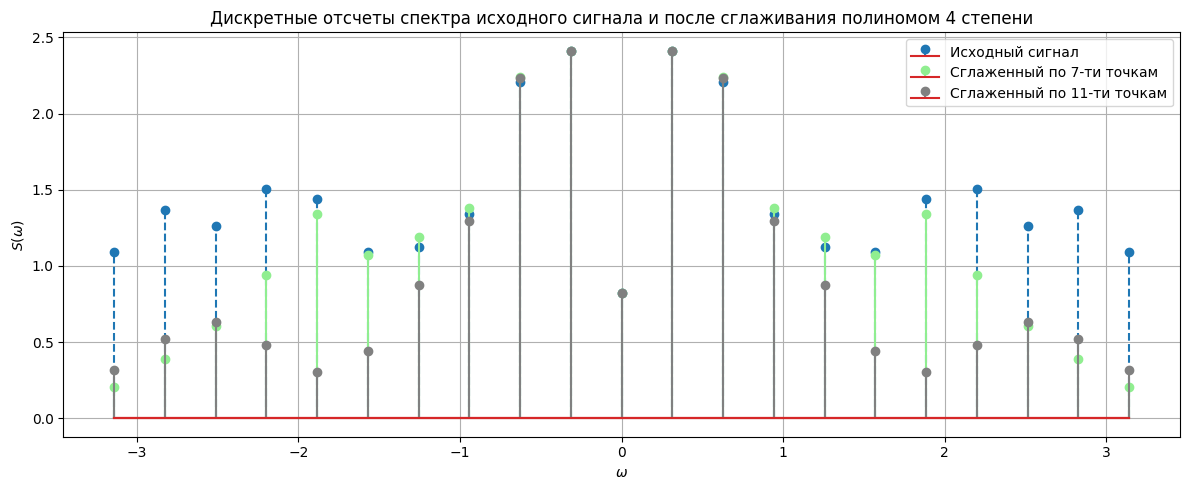

In [114]:
plt.figure(figsize=(12, 5))
plt.title('Дискретные отсчеты спектра исходного сигнала и после сглаживания полиномом 4 степени')
plt.xlabel('$ω$')
plt.ylabel('$S(\omega)$')
plt.stem(omega_arr, [np.abs(spectr_initial(omega)) for omega in omega_arr], '--',label='Исходный сигнал')
plt.stem(omega_arr, [np.abs(spectr_quadro_7(omega)) for omega in omega_arr], 'lightgreen',label='Сглаженный по 7-ти точкам')
plt.stem(omega_arr, [np.abs(spectr_quadro_11(omega)) for omega in omega_arr], 'gray',label='Сглаженный по 11-ти точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

ПУНКТ 7.
&emsp;Визуально оценив графики при сглаживании полиномом 4 степени по 7 и 11 точкам, можем сделать вывод о том, что результат сопоставим со значениями $H(\omega)$, поскольку также:
* *С увеличением частоты $\omega$* увеличивается подавление сигнала
* В окрестностях точки $\omega=0$ (на низких частотах) есть полоса пропускания (диапазон частот, которые почти не фильтруются)
* *С увеличением числа точек* высокие частоты подавляются сильнее

&emsp; Также, можем заметить, что *__полоса пропускания частот здесь еще шире, чем при сглаживании полиномом 2 степени__*.

---

## Выводы

&emsp;В результате выполненной работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

&emsp; В ходе работы был сформирован дискретный сигнал посредством дискретизации аналогового сигнала, представляющего собой линейную комбинацию косинусоид.

&emsp;Были исследованы и вычислены дискретные отсчёты спектра дискретного сигнала с помощью ДПФ, а также сравнены со спектрами дискретных сигналов, сглаженных прямой линией, полиномами 2 и 4ой степеней при 5 и 9 точках и при 7 и 11 точках соответственно. Полученные результаты позволили сделать выводы о том, что при увеличении степени сглаживающего полинома полоса пропускания низких частот увеличивается, при увеличении количества точек усиливается подавление сигнала.

&emsp;Был проведен сопоставительный анализ частотных характеристик передаточных функций и графиков исходных и отфильтрованных сигналов. Результаты сопоставимы со значениями передаточной функции $H(\omega)$, поскольку были схожие закономерности в зависимости от количества точек, степени полинома сглаживания и значения частоты $\omega$.